# 07: Sample Cities

Data from: [https://simplemaps.com/data/world-cities](https://simplemaps.com/data/world-cities)

Sample cities to pull images off of from Google Earth Engine.

In [10]:
import pandas as pd
import numpy as np

In [2]:
world_cities = pd.read_csv('../data/worldcities.csv')

In [3]:
world_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519


In [4]:
world_cities.shape

(42905, 11)

Population has a very long right tail, so it may be more informative to view on log scale.

In [49]:
world_cities_filtered = world_cities[world_cities['population'] != 0]
world_cities_filtered.shape

(42900, 11)

<AxesSubplot:ylabel='Frequency'>

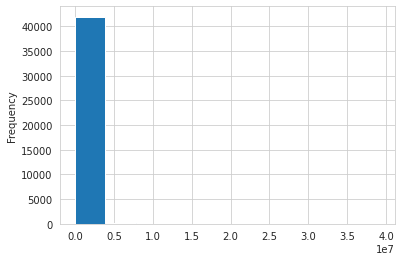

In [50]:
world_cities_filtered['population'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

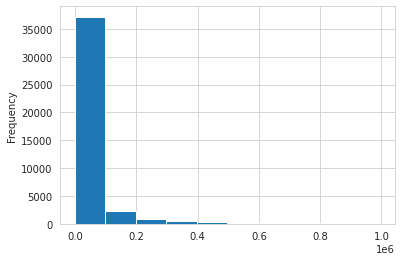

In [101]:
world_cities_filtered[world_cities_filtered['population'] < 1e6].population.plot.hist()

<AxesSubplot:ylabel='Frequency'>

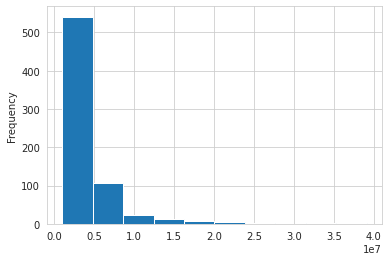

In [102]:
world_cities_filtered[world_cities_filtered['population'] > 1e6].population.plot.hist()

<AxesSubplot:ylabel='Frequency'>

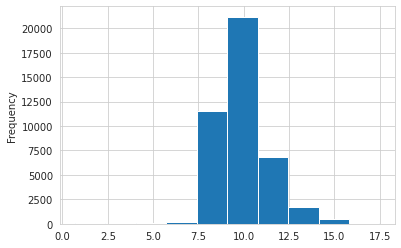

In [51]:
np.log(world_cities_filtered['population']).plot.hist()

- Divide population into 5 bins
- Randomly sample from each bin
    - We can get census data for years 2000, 2005 and 2010
    - To get roughly 100 samples for each bin, we can start with sampling 40 countries in each bin
    - 40 * 3 = 120 images for each bin, total of 600 images

In [60]:
world_cities_filtered['log_population'] = np.log(world_cities_filtered['population'])
world_cities_filtered.sort_values(by = 'log_population', inplace=True)
world_cities_filtered.reset_index(inplace = True)

/tmp/ipykernel_1207370/2828231853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cities_filtered['log_population'] = np.log(world_cities_filtered['population'])
/tmp/ipykernel_1207370/2828231853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cities_filtered.sort_values(by = 'log_population', inplace=True)


In [61]:
world_cities_filtered.head()

,index,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,log_population
0,9401,Mawlamyine,Mawlamyine,16.4847,97.6258,Myanmar,MM,MMR,Mon State,admin,2.0,1104530702,0.693147
1,42282,Ambarchik,Ambarchik,69.6167,162.2833,Russia,RU,RUS,Sakha (Yakutiya),NaN,4.0,1643739159,1.386294
2,42871,Zillah,Zillah,28.5504,17.5834,Libya,LY,LBY,Al Jufrah,NaN,10.0,1434245699,2.302585
3,42870,Puca Urco,Puca Urco,-2.3328,-71.9167,Peru,PE,PER,Loreto,NaN,10.0,1604085670,2.302585
4,42869,Andoas,Andoas,-2.9021,-76.4025,Peru,PE,PER,Loreto,NaN,10.0,1604038416,2.302585


In [63]:
world_cities_filtered.shape

(42900, 13)

In [103]:
# Get min and max population
pop_quantiles = world_cities_filtered[['population', 'log_population']].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
pop_quantiles

,population,log_population
0.0,2.0,0.693147
0.2,7308.8,8.896834
0.4,11867.0,9.381517
0.6,21653.4,9.982918
0.8,52364.6,10.865986
1.0,39105000.0,17.481761


In [104]:
sample0 = world_cities_filtered[world_cities_filtered['population'] <= pop_quantiles.population[0.2]].sample(40, random_state=10)
sample1 = world_cities_filtered[world_cities_filtered['population'] <= pop_quantiles.population[0.4]].sample(40, random_state=10)
sample2 = world_cities_filtered[world_cities_filtered['population'] <= pop_quantiles.population[0.6]].sample(40, random_state=10)
sample3 = world_cities_filtered[world_cities_filtered['population'] <= pop_quantiles.population[0.8]].sample(40, random_state=10)
sample4 = world_cities_filtered[world_cities_filtered['population'] <= pop_quantiles.population[1.0]].sample(40, random_state=10)

In [117]:
sample = pd.concat([sample0, sample1, sample2, sample3, sample4]).drop('index', axis = 1)

In [118]:
sample.head(10)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,log_population
3223,Taiuva,Taiuva,-21.1239,-48.4519,Brazil,BR,BRA,São Paulo,NaN,5605.0,1076764363,8.631414
775,Agnone,Agnone,41.8104,14.3785,Italy,IT,ITA,Molise,NaN,5008.0,1380842283,8.518792
1469,San Francisco,San Francisco,20.5333,-102.5000,Mexico,MX,MEX,Jalisco,NaN,5167.0,1484609468,8.550048
7650,Buziaş,Buzias,45.6500,21.6000,Romania,RO,ROU,Timiş,NaN,7023.0,1642000046,8.856946
116,Čučer-Sandevo,Cucer-Sandevo,42.0975,21.3877,Macedonia,MK,MKD,Čučer-Sandevo,admin,274.0,1807969277,5.613128
4545,La Primaube,La Primaube,44.3139,2.5350,France,FR,FRA,Occitanie,NaN,5987.0,1250003343,8.697346
5242,Wilkins,Wilkins,40.4265,-79.8230,United States,US,USA,Pennsylvania,NaN,6204.0,1840150316,8.732950
4533,Waki,Waki,34.2022,132.2203,Japan,JP,JPN,Hiroshima,NaN,5984.0,1392843750,8.696845
7023,Erval Sêco,Erval Seco,-27.5489,-53.5039,Brazil,BR,BRA,Rio Grande do Sul,NaN,6802.0,1076284730,8.824972
930,Bāndhkhola,Bandhkhola,24.2542,87.9880,India,IN,IND,West Bengal,NaN,5042.0,1356958521,8.525558


In [107]:
sample.shape

(200, 13)

<AxesSubplot:ylabel='Frequency'>

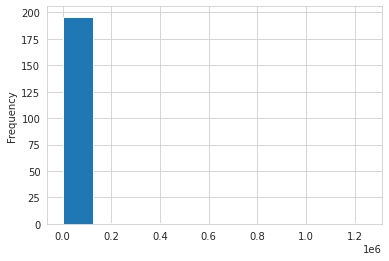

In [108]:
sample['population'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

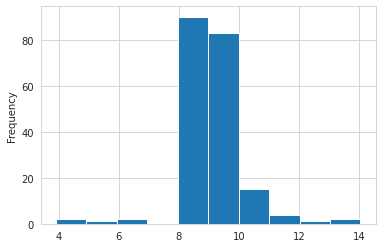

In [109]:
sample['log_population'].plot.hist()

There are slightly more countries relatively in this sample with low/high populations, but the distribution still looks very skewed to bin in the middle. In order to train the model, I would want to have enough samples of low and high population images. I may have to take a different sample later, but we'll start with this for now.

Additionally, I'll be taking an image around the city (not just the city) so these population numbers will only serve as a proxy for what the actual population distribution will look like.

In [120]:
sample.to_csv('../data/city_samples_0.csv', index = False)

In [119]:
sample.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,log_population
3223,Taiuva,Taiuva,-21.1239,-48.4519,Brazil,BR,BRA,São Paulo,NaN,5605.0,1076764363,8.631414
775,Agnone,Agnone,41.8104,14.3785,Italy,IT,ITA,Molise,NaN,5008.0,1380842283,8.518792
1469,San Francisco,San Francisco,20.5333,-102.5000,Mexico,MX,MEX,Jalisco,NaN,5167.0,1484609468,8.550048
7650,Buziaş,Buzias,45.6500,21.6000,Romania,RO,ROU,Timiş,NaN,7023.0,1642000046,8.856946
116,Čučer-Sandevo,Cucer-Sandevo,42.0975,21.3877,Macedonia,MK,MKD,Čučer-Sandevo,admin,274.0,1807969277,5.613128
